<a href="https://colab.research.google.com/github/whiteevl/laporan/blob/main/Proyek_Akhir_Membuat_Model_Sistem_Rekomendasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Identitas Diri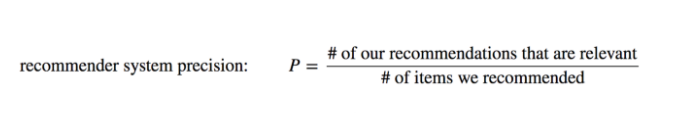**


In [1]:
nama = "Aradea Bayu Murti"
email = "whiteevilfero@gmail.com"
no_hp = "62857****47643"
id_dicoding = "priceofdarkness"
link_dataset = "https://www.kaggle.com/datasets/lava18/google-play-store-apps"

print(f'Nama: {nama}')
print(f'Email: {email}')
print(f'No. HP: {no_hp}')
print(f'ID Dicoding: {id_dicoding}')
print(f'Dataset: {link_dataset}')

Nama: Aradea Bayu Murti
Email: whiteevilfero@gmail.com
No. HP: 62857****47643
ID Dicoding: priceofdarkness
Dataset: https://www.kaggle.com/datasets/lava18/google-play-store-apps


# **Library dan Modul yang Digunakan**


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# **Instalasi Kaggle, Download Dataset, Dan Unzip Dataset**



In [3]:
!pip install kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aradea","key":"a61e2c70deb2d29e620be03ef0a045f2"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d lava18/google-play-store-apps

  0% 0.00/1.94M [00:00<?, ?B/s]
100% 1.94M/1.94M [00:00<00:00, 162MB/s]


In [7]:
import zipfile
nama_file_zip = "google-play-store-apps.zip"
direktori_zip = "/content/" + nama_file_zip
direktori_ekstraksi = "/content/"
with zipfile.ZipFile(direktori_zip, 'r') as zip_ref:
    zip_ref.extractall(direktori_ekstraksi)
print("File berhasil diekstrak.")

File berhasil diekstrak.


# **Data Understanding**


Pemahaman Data merupakan langkah awal dalam suatu proyek untuk mengenal dan memahami dataset yang tersedia. Agar konten dataset dapat lebih dipahami dengan mudah, lakukan proses pemuatan data terlebih dahulu. Pastikan untuk mengimpor semua perpustakaan yang diperlukan dalam pengembangan model.

Disini terdapat 2 file dalam bentuk csv yaitu:

- googleplaystore.csv
- googleplaystore_user_reviews.csv

In [8]:
googleplaydata = pd.read_csv("googleplaystore.csv")
googleplaydata

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [9]:
googleplaydata.shape

(10841, 13)

Hasil dari kode di atas menyajikan informasi berikut:

- Terdapat total 10841 entri dalam dataset yang tersedia.

- Dalam dataset ini terdapat 13 fitur, yakni: Aplikasi (App), Kategori (Category), Rating, Ulasan (Reviews), Ukuran (Size), Instalasi (Installs), Tipe (Type), Harga (Price), Rating Konten (Content Rating), Genre, Terakhir Diperbarui (Last Updated), Versi Saat Ini (Current Ver), Versi Android (Android Ver).

**Penjelasan Variabel**

Variabel-variabel dalam dataset Google Play Store adalah sebagai berikut:

- Aplikasi (App): Nama dari aplikasi tersebut.

- Kategori (Category): Kategori di mana aplikasi tersebut termasuk.

- Rating: Penilaian yang diberikan oleh pengguna untuk aplikasi (skala 1-5 bintang).

- Ulasan (Reviews): Jumlah ulasan yang diberikan oleh pengguna untuk aplikasi tersebut.

- Ukuran (Size): Ukuran dari aplikasi tersebut dalam byte.

- Instalasi (Installs): Jumlah pengguna yang telah menginstal aplikasi tersebut.

- Tipe (Type): Jenis aplikasi, apakah berbayar (Paid) atau gratis (Free).

- Harga (Price): Harga dari aplikasi tersebut dalam dollar USD.

- Rating Konten (Content Rating): Klasifikasi usia yang cocok untuk penggunaan aplikasi tersebut (semua umur, dewasa 17+, dll).

- Genre: Kategori dari genre aplikasi (Kedokteran, Gaya Hidup, dll).

- Terakhir Diperbarui (Last Updated): Tanggal terakhir aplikasi diperbarui oleh pengembang.

- Versi Saat Ini (Current Ver): Versi terbaru dari aplikasi tersebut.

- Versi Android (Android Ver): Versi minimum dari Android yang dibutuhkan untuk menginstal aplikasi tersebut.


In [10]:
googleplaydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Dari hasil output, dapat diamati bahwa:

- Ada 12 kolom dengan tipe data objek, yaitu: Aplikasi (App), Kategori (Category), Ulasan (Reviews), Ukuran (Size), Instalasi (Installs), Tipe (Type), Harga (Price), Rating Konten (Content Rating), Genre, Terakhir Diperbarui (Last Updated), Versi Saat Ini (Current Ver), dan Versi Android (Android Ver). Kolom-kolom ini merujuk pada fitur-fitur kategorikal.

- Ada 1 kolom numerik dengan tipe data float64, yaitu: Rating.



Jika tujuannya adalah untuk membuat sistem rekomendasi yang lebih kompleks, maka semua fitur-fitur dalam dataset harus dimasukkan ke dalam model. Namun, untuk proyek ini, hanya fitur-fitur Aplikasi (App), Kategori (Category), dan Rating yang akan digunakan untuk membuat model sistem rekomendasi yang sederhana.
Pada saat menerapkan Co
ntent Based Filtering, data yang diperlukan adalah nama Aplikasi dan Kategori. Sementara untuk Collaborative Filtering, data yang dibutuhkan adalah nama Aplikasi dan Rating.
Selanjutnya, gunakan fungsi unique() untuk mengetahui jumlah entri unik berdasarkan Aplikasi (App), Kategori (Category), dan Rating.

In [11]:
print('data App: ', len(googleplaydata.App.unique()))
print('data Category: ', len(googleplaydata.Category.unique()))
print('data Rating: ', len(googleplaydata.Rating.unique()))

data App:  9660
data Category:  34
data Rating:  41


# **Exploratory Data Analysis**


In [12]:
categorical_features = ['App', 'Category']
numerical_features = ['Rating']

1. Data Kategori

In [13]:
feature = categorical_features[1]
count = googleplaydata[feature].value_counts()
percent = 100*googleplaydata[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(df)

                     Jumlah sampel  Persentase
FAMILY                        1972        18.2
GAME                          1144        10.6
TOOLS                          843         7.8
MEDICAL                        463         4.3
BUSINESS                       460         4.2
PRODUCTIVITY                   424         3.9
PERSONALIZATION                392         3.6
COMMUNICATION                  387         3.6
SPORTS                         384         3.5
LIFESTYLE                      382         3.5
FINANCE                        366         3.4
HEALTH_AND_FITNESS             341         3.1
PHOTOGRAPHY                    335         3.1
SOCIAL                         295         2.7
NEWS_AND_MAGAZINES             283         2.6
SHOPPING                       260         2.4
TRAVEL_AND_LOCAL               258         2.4
DATING                         234         2.2
BOOKS_AND_REFERENCE            231         2.1
VIDEO_PLAYERS                  175         1.6
EDUCATION    

Ini adalah distribusi data Kategori dengan plot batang visual.

<Axes: title={'center': 'Category'}>

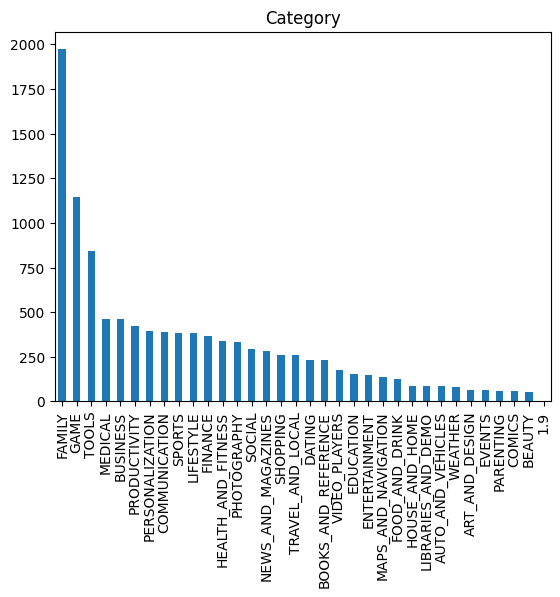

In [14]:
count.plot(kind='bar', title=feature)

2. Data Numerik

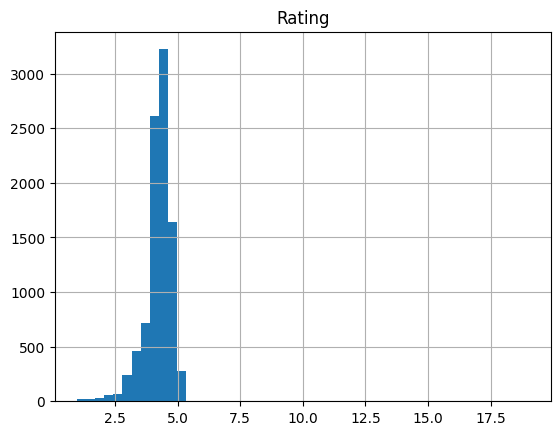

In [15]:
googleplaydata.hist(bins=50)
plt.show()

Karena hanya ada satu fitur numerik, kita hanya dapat melihat distribusi data dari fitur Rating saja.

In [16]:
googleplaydata.describe()


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Berdasarkan informasi ini, kita dapat mengetahui bahwa nilai rating maksimum adalah 19 dan nilai minimumnya adalah 0. Ini menunjukkan bahwa skala rating berkisar antara 0 hingga 2. Dengan sampai pada tahap ini, variabel-variabel dalam data sudah cukup dipahami dengan baik.

# **Data Preparation**


Beberapa permasalahan umum yang perlu diselesaikan dalam data meliputi outlier, duplikat, dan nilai yang hilang. Dalam proyek ini, masalah-masalah ini akan diatasi dengan menggunakan metode penghapusan data.

# **1. Penanganan Outlier**

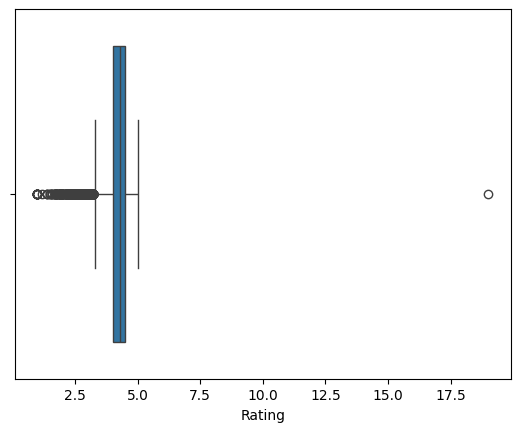

In [17]:
googleplaydata1=googleplaydata.select_dtypes(exclude=['object'])
for column in googleplaydata1:
        plt.figure()
        sns.boxplot(data=googleplaydata1, x=column)

In [18]:
googleplaydata['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [19]:
googleplaydata[googleplaydata['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Karena hanya ada satu outlier dalam data, solusinya adalah dengan menghapus data outlier tersebut.

In [20]:
googleplaydata.drop(googleplaydata.index[10472], axis=0, inplace=True)

# **2. Penanganan Data Duplikat**

In [21]:
googleplaydata.duplicated().sum()

483

In [22]:
googleplaydata.drop_duplicates(inplace=True)
googleplaydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# **3. Penanganan Missing Value**

In [23]:
googleplaydata.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

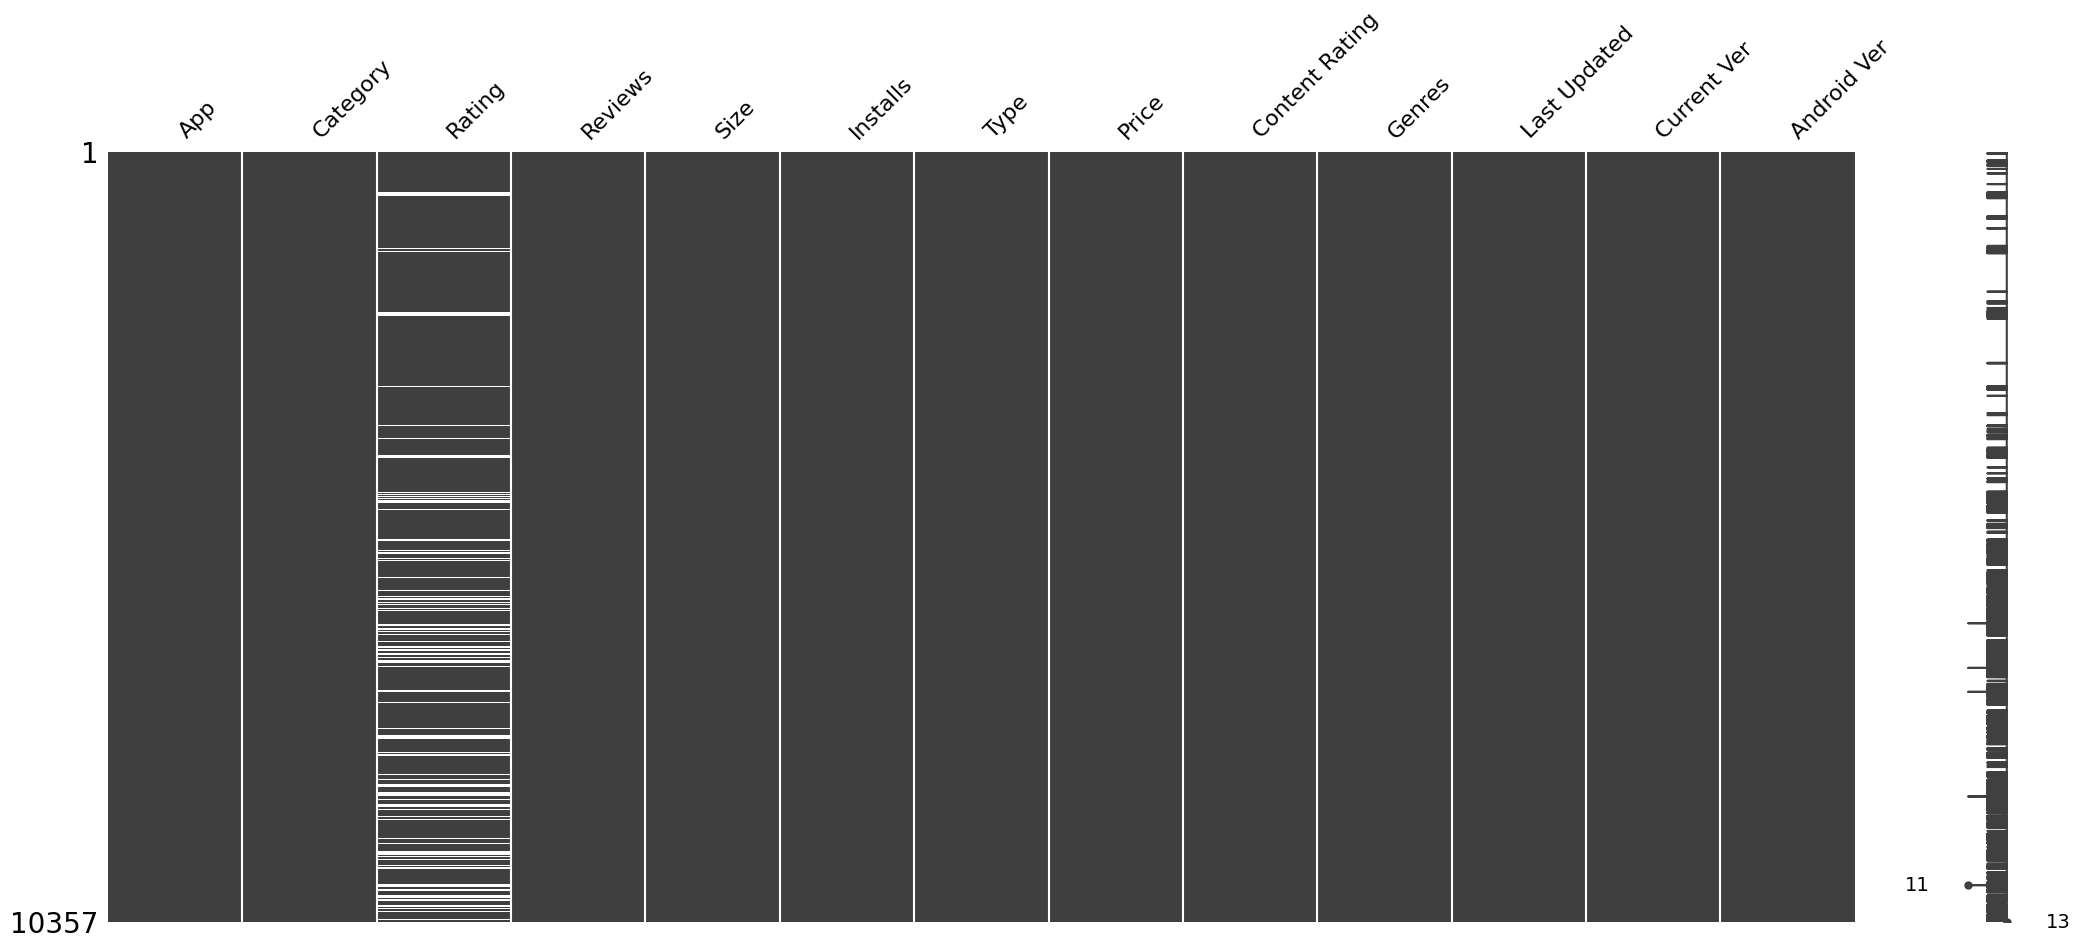

In [24]:
sorted_null = msno.nullity_sort(googleplaydata)
figures = msno.matrix(sorted_null)

Karena ada 1465 nilai kosong pada fitur Rating yang akan digunakan, kita dapat mengatasi ini dengan menghapusnya.

In [25]:
googleplaydata = googleplaydata.dropna()
googleplaydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


# **4. Penyusutan Fitur**

Sebelum membuat model, beberapa fitur dapat dihilangkan. Dalam proyek ini, Current Ver dan Last Updated dihapus karena tidak terlalu penting untuk pembuatan model rekomendasi.

In [26]:
googleplaydata.drop(['Current Ver',	'Last Updated'], inplace=True,axis=1)
googleplaydata.head()

<ipython-input-26-4439ffcbe9d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  googleplaydata.drop(['Current Ver',	'Last Updated'], inplace=True,axis=1)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,4.4 and up


# **Pemodelan dan Hasil**

Dalam proses pemodelan, dua model diuji coba, yaitu Kesamaan Cosine dan K-Nearest Neighbor.

**1. Model Cosine Similarity**

Metode ini diterapkan dalam sistem rekomendasi untuk mengidentifikasi representasi fitur yang penting dari setiap kategori. Dalam model Content Based Filtering yang menggunakan Kesamaan Cosine, model dapat difilter berdasarkan fitur-fitur yang telah dipilih. Dalam proyek ini, beberapa filter telah diujicoba, termasuk:


- Model Content Based Filtering (dengan Filter Genre)

- Model Content Based Filtering (dengan Filter Type)

- Model Content Based Filtering (dengan Filter Content Rating)

**a. Model Filtering Berbasis Konten (dengan Filter Genre)**

In [27]:
tfid = TfidfVectorizer()
tfid.fit(googleplaydata['Genres'])
tfid.get_feature_names_out()

array(['action', 'adventure', 'arcade', 'art', 'audio', 'auto', 'beauty',
       'board', 'books', 'brain', 'business', 'card', 'casino', 'casual',
       'comics', 'communication', 'creativity', 'dating', 'demo',
       'design', 'drink', 'editors', 'education', 'educational',
       'entertainment', 'events', 'finance', 'fitness', 'food', 'games',
       'health', 'home', 'house', 'libraries', 'lifestyle', 'local',
       'magazines', 'maps', 'medical', 'music', 'navigation', 'news',
       'parenting', 'personalization', 'photography', 'play', 'players',
       'playing', 'pretend', 'productivity', 'puzzle', 'racing',
       'reference', 'role', 'shopping', 'simulation', 'social', 'sports',
       'strategy', 'tools', 'travel', 'trivia', 'vehicles', 'video',
       'weather', 'word'], dtype=object)

Kemudian, lakukan penyesuaian dan transformasi ke dalam bentuk matriks.

In [28]:
tfidf_matrix = tfid.fit_transform(googleplaydata['Genres'])
tfidf_matrix.shape

(8886, 66)

Amati, matriks mempunyai ukuran (8886, 66). Nilai 8886 adalah jumlah data dan 22 adalah matriks kategori yang terpilih. Untuk mendapatkan matriks vektor tf-idf, gunakanlah fungsi todense().

In [29]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfid.get_feature_names_out(),
    index=googleplaydata.Genres
).sample(22, axis=1).sample(10, axis=0)

,creativity,news,parenting,lifestyle,vehicles,sports,health,comics,shopping,editors,...,trivia,reference,medical,brain,simulation,local,photography,word,entertainment,players
Genres,,,,,,,,,,,,,,,,,,,,,
Video Players & Editors,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.585381,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.585381
Books & Reference,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Arcade,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Sports,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Food & Drink,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Finance,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
News & Magazines,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Personalization,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Shopping,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


Hasil matriks tf-idf di atas menggambarkan keterkaitan antara nama Aplikasi dan kategori yang dipilih. Matriks ini menunjukkan seberapa eratnya hubungan antara nama Aplikasi dengan kategori yang dipilih. Kemudian, untuk membuat sistem rekomendasi, diperlukan perhitungan tingkat kesamaan antara satu nama Aplikasi dengan yang lainnya untuk menghasilkan daftar kandidat Aplikasi yang akan direkomendasikan.

**A. Cosine Similarity**



In [31]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.71961846, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.71961846, 1.        , 0.71961846, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.71961846, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

Program di atas akan memberikan output berupa matriks kesamaan dalam format array. Berikutnya, periksa matriks kesamaan setiap Aplikasi dengan menampilkan nama Aplikasi dalam 5 kolom sampel (axis = 1) dan 5 baris sampel (axis=0).

In [32]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=googleplaydata['App'], columns=googleplaydata['App'])
print('Shape:', cosine_sim_df.shape)
cosine_sim_df.sample(5, axis=1).sample(5, axis=0)

Shape: (8886, 8886)


App,CB Heroes,You're an Anime,Live Chat - Free Video Talk,Cafe.ba,"Dolphin Browser - Fast, Private & Adblock🐬"
App,,,,,
Minion Rush: Despicable Me Official Game,0.0,0.0,0.0,0.0,0.0
Hole.io,0.0,0.0,0.0,0.0,0.0
FR: My Secret Pets!,0.0,0.0,0.0,0.0,0.0
EW Widgets for Zooper,0.0,0.0,0.0,0.0,0.0
"U - Webinars, Meetings & Messenger",0.0,0.0,0.0,0.0,1.0


Dengan metode cosine similarity, kita dapat mengidentifikasi kemiripan antara satu Aplikasi dengan Aplikasi lainnya. Bentuk (8886, 8886) adalah ukuran matriks kesamaan dari data yang tersedia. Berdasarkan data tersebut, matriks tersebut sebenarnya berukuran 8886 Aplikasi x 8886 Aplikasi (masing-masing di sumbu X dan Y). Dengan kata lain, model dapat mengidentifikasi tingkat kemiripan di antara 8886 Aplikasi. Model yang dikembangkan kemudian dapat memberikan rekomendasi sejumlah N Aplikasi serupa.Dengan menggunakan data kesamaan (similarity), kita dapat menghasilkan daftar Aplikasi yang mirip (serupa) dengan Aplikasi yang telah digunakan sebelumnya oleh pengguna. Selanjutnya, kita akan membuat sejumlah rekomendasi teratas (top-N recommendation) Aplikasi untuk pengguna yang ditentukan dalam parameter k.

In [33]:
def app_recommendations(app_name, similarity_data=cosine_sim_df, items=googleplaydata[['App', 'Genres']], k=5):

    index = similarity_data.loc[:,app_name].to_numpy().argpartition(
        range(-1, -k, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    closest = closest.drop(app_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Amati, dengan menggunakan argpartition, kita akan mengambil sejumlah nilai k tertinggi dari data similarity (dalam kasus ini: dataframe cosine_sim_df). Kemudian, kita akan mengambil data dari similarity tertinggi ke terendah. Data ini akan disimpan dalam variabel closest. Setelah itu, kita akan menerapkan kode untuk menemukan rekomendasi yang serupa dengan Aplikasi yang pernah digunakan oleh pengguna.

In [34]:
googleplaydata[googleplaydata.App.eq('EF Spelling Bee')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
9287,EF Spelling Bee,FAMILY,3.0,2,9.4M,500+,Free,0,Everyone,Education;Education,4.3 and up


In [35]:
app_recommendations('EF Spelling Bee')

,App,Genres
0,Timetable,Education
1,British Columbia License,Education
2,Starfall Free & Member,Education;Education
3,AP Calculus BC Practice Test,Education
4,Wifi BT Scanner,Education


Sistem berhasil memberikan rekomendasi 5 nama Aplikasi dengan kategori 'Genres' Pendidikan yang serupa dengan Aplikasi yang sebelumnya digunakan oleh pengguna. Model ini dapat disesuaikan dengan mengubah filter lainnya, seperti Tipe dan Rating Konten.

**B. Model Content Based Filtering (dengan Filter Type)**

In [36]:
tfid = TfidfVectorizer()
tfid.fit(googleplaydata['Type'])
tfid.get_feature_names_out()
tfidf_matrix = tfid.fit_transform(googleplaydata['Type'])
tfidf_matrix.todense()
cosine_sim = cosine_similarity(tfidf_matrix)

def app_recommendations(app_name, similarity_data=cosine_sim_df, items=googleplaydata[['App', 'Type']], k=5):

    index = similarity_data.loc[:,app_name].to_numpy().argpartition(
        range(-1, -k, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    closest = closest.drop(app_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [37]:
app_recommendations('EF Spelling Bee')

,App,Type
0,Timetable,Free
1,British Columbia License,Free
2,Starfall Free & Member,Free
3,AP Calculus BC Practice Test,Free
4,Wifi BT Scanner,Free


Model ini berhasil membantu pengguna menemukan aplikasi yang serupa dengan Tipe Gratis.

**C. Model Content Based Filtering (dengan Filter Content Rating)**

In [38]:
tfid = TfidfVectorizer()
tfid.fit(googleplaydata['Content Rating'])
tfid.get_feature_names_out()
tfidf_matrix = tfid.fit_transform(googleplaydata['Content Rating'])
tfidf_matrix.todense()
cosine_sim = cosine_similarity(tfidf_matrix)

def app_recommendations(app_name, similarity_data=cosine_sim_df, items=googleplaydata[['App', 'Content Rating']], k=5):

    index = similarity_data.loc[:,app_name].to_numpy().argpartition(
        range(-1, -k, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    closest = closest.drop(app_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [39]:
app_recommendations('EF Spelling Bee')

,App,Content Rating
0,Timetable,Everyone
1,British Columbia License,Everyone
2,Starfall Free & Member,Everyone
3,AP Calculus BC Practice Test,Everyone
4,Wifi BT Scanner,Everyone


Model ini berhasil membantu pengguna menemukan aplikasi yang serupa dengan Rating Konten yang diinginkan oleh pengguna. Untuk percobaan selanjutnya, filter dapat diubah dengan fitur lainnya agar sesuai dengan kebutuhan.

# **2. Model K-Nearest Neighbor**

Untuk algoritma lain yang sedang diuji adalah menggunakan K-Nearest Neighbor (KNN). KNN adalah metode untuk mengklasifikasikan data berdasarkan nilai pembelajaran yang memiliki jarak terdekat dengan data yang dianalisis. Langkah pertama yang perlu dilakukan adalah memilih indeks data yang ingin dicari kemiripannya. Dalam kasus ini, fitur yang dipilih adalah Aplikasi.

In [40]:
app_name = pd.DataFrame({'App':googleplaydata['App']})
app_name.head()

,App
0,Photo Editor & Candy Camera & Grid & ScrapBook
1,Coloring book moana
2,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,Sketch - Draw & Paint
4,Pixel Draw - Number Art Coloring Book


Kemudian, hilangkan fitur-fitur yang tidak diperlukan dalam pembuatan model. Dalam kasus ini, fitur 'Tipe', 'Rating Konten', 'Genres', 'Android Ver' dihapus.

In [41]:
googleplaydata.drop(['Type',	'Content Rating',	'Genres',	'Android Ver'], inplace=True,axis=1)
googleplaydata.head()

<ipython-input-41-fbb5117b60a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  googleplaydata.drop(['Type',	'Content Rating',	'Genres',	'Android Ver'], inplace=True,axis=1)


,App,Category,Rating,Reviews,Size,Installs,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0


Selanjutnya, ubah indeks yang awalnya dari 0 hingga n menjadi nama aplikasi.

In [42]:
googleplaydata.set_index('App',inplace=True)
googleplaydata.head()

,Category,Rating,Reviews,Size,Installs,Price
App,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0


Kemudian, lakukan enkode pada fitur Kategori agar fitur non-numerik ini diubah menjadi vektor biner, di mana nilai 1 menunjukkan kategori yang relevan dan 0 untuk kategori lainnya. Salah satu teknik yang sering digunakan adalah one-hot encoding. Lakukan proses enkode ini menggunakan fitur get_dummies.

In [43]:
googleplaydata = pd.concat([googleplaydata, pd.get_dummies(googleplaydata['Category'], prefix='Category')],axis=1)
googleplaydata.drop(['Category'], axis=1, inplace=True)
googleplaydata.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
App,,,,,,,,,,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Coloring book moana,3.9,967,14M,"500,000+",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",4.7,87510,8.7M,"5,000,000+",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Berikutnya, sebelum memodelkan data, lakukan penyesuaian data dengan melakukan penggantian string dan mengubah tipe data agar dapat di-scaling. Dalam hal ini, sesuaikan data pada kolom 'Ukuran', 'Instalasi', dan 'Harga'.

In [44]:
googleplaydata['Size']= googleplaydata['Size'].str.replace('M','000')
googleplaydata['Size'] = googleplaydata['Size'].str.replace('k','')
googleplaydata['Size'] = googleplaydata['Size'].replace("Varies with device",'0')
googleplaydata['Size'] = googleplaydata['Size'].astype('float')
for item in googleplaydata['Size']:
  if item < 10:
      googleplaydata['Size'] = googleplaydata['Size'].replace(item, item*1000)
googleplaydata['Size'] = googleplaydata['Size']/1000


googleplaydata['Installs'] = googleplaydata['Installs'].str.replace('+', '')
googleplaydata['Installs'] = googleplaydata['Installs'].str.replace(',', '')
googleplaydata['Installs'] = googleplaydata['Installs'].astype('int')


googleplaydata['Price'] = googleplaydata['Price'].str.replace('$', '')
googleplaydata['Price'] = googleplaydata['Price'].astype('float')

<ipython-input-44-57727e304155>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  googleplaydata['Installs'] = googleplaydata['Installs'].str.replace('+', '')
<ipython-input-44-57727e304155>:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  googleplaydata['Price'] = googleplaydata['Price'].str.replace('$', '')


Lakukan penskalaan. Penskalaan adalah salah satu teknik dalam normalisasi data yang bertujuan untuk membuat variabel dengan rentang nilai yang luas menjadi nilai yang memiliki rentang yang seragam. Pada model ini, digunakan metode normalisasi min-max yang mengubah sebuah kumpulan data menjadi skala mulai dari 0 (minimum) hingga 1 (maksimum).

In [45]:
column_numeric = ['Reviews', 'Installs', 'Rating', 'Size', 'Price']
scaler = MinMaxScaler()
scaled = scaler.fit_transform(googleplaydata[column_numeric])

i=0
for column in column_numeric:
    googleplaydata[column] = scaled[:,i]
    i += 1

googleplaydata.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
App,,,,,,,,,,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,0.775,0.000002,0.190,0.00001,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Coloring book moana,0.725,0.000012,0.140,0.00050,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",0.925,0.001120,0.087,0.00500,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sketch - Draw & Paint,0.875,0.002759,0.250,0.05000,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pixel Draw - Number Art Coloring Book,0.825,0.000012,0.028,0.00010,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Langkah berikutnya adalah membuat model menggunakan NearestNeighbors dengan metrik pembelajaran jarak antar data menggunakan 'euclidean'.

In [46]:
model = NearestNeighbors(metric='euclidean')
model.fit(googleplaydata)

NearestNeighbors(metric='euclidean')

Berikutnya, buatlah fungsi rekomendasi dengan menghitung skor jarak.

In [47]:
def RecommendedApps_model(appname:str, recommend_apps:int=5):
  print(f'Apabila pengguna menyukai aplikasi... {appname[0]}\Berikut ini adalah aplikasi yang juga mungkin akan disukai :')
  distances, neighbors = model.kneighbors(googleplaydata.loc[appname],n_neighbors=recommend_apps)
  similar_app = []
  for appname in app_name.loc[neighbors[0][:]].values:
    similar_app.append(appname[0])
  similar_distance = []
  for distance in distances[0]:
    similar_distance.append(f"{round(100-distance, 2)}%")
  return pd.DataFrame(data = {"App Name" : similar_app, "Similiarity Score" : similar_distance})

RecommendedApps_model(app_name.loc[100])

Apabila pengguna menyukai aplikasi... Natural recipes for your beauty\Berikut ini adalah aplikasi yang juga mungkin akan disukai :


,App Name,Similiarity Score
0,Hush - Beauty for Everyone,100.0%
1,Hairstyles step by step,99.99%
2,Tie - Always be happy,99.97%
3,Girls Hairstyles,99.96%
4,Mirror - Zoom & Exposure -,99.95%


Jika pengguna menyukai aplikasi 'Natural recipes for your beauty', berikut adalah beberapa aplikasi lain yang mungkin juga disukai:

# **Evaluasi**

**1. Precission**

Ketepatan digunakan untuk mengevaluasi kinerja sistem. Ketepatan adalah tingkat akurasi antara permintaan informasi dari pengguna dengan jawaban yang diberikan oleh sistem.

Berdasarkan hasil pengujian pada model Penyaringan Berbasis Konten menggunakan Penyaring Genre, Tipe, dan Rating Konten, ditemukan bahwa dari 5 rekomendasi yang diberikan, semuanya memiliki genre, tipe, dan rating konten yang serupa dengan aplikasi yang sebelumnya digunakan oleh pengguna. Dengan demikian, Sistem Rekomendasi Top-5 yang dibangun memiliki tingkat ketepatan sebesar 5/5 = 100%.

**2. Calinski Harabasz Score**

Calinski-Harabasz (CH) adalah salah satu metrik evaluasi untuk algoritma clustering. Metrik ini menghitung rasio antara dispersi dalam klaster dan penyebaran antar klaster. Semakin tinggi skor CH, semakin baik klaster terpisah.

In [49]:
calinski_harabasz_score(googleplaydata, app_name)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


7.4998974132315315

Dalam model ini, terlihat bahwa klaster belum terpisah dengan baik karena nilai skornya masih cukup rendah. Hal ini dapat mengakibatkan terjadinya rekomendasi untuk beberapa aplikasi yang tidak sesuai dengan preferensi pengguna.

**3. Davies Bouldin Score**

Davies-Bouldin (DB) juga merupakan salah satu metrik evaluasi untuk algoritma clustering. Metrik ini menghitung rata-rata jarak antara setiap titik dalam data. Skor yang rendah menunjukkan bahwa pemisahan antara kluster dalam model cukup baik.

In [50]:
davies_bouldin_score(googleplaydata, app_name)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.585735926526135

Evaluasi DB menunjukkan bahwa model ini memiliki skor yang relatif kecil. Ini menunjukkan bahwa model telah berhasil memisahkan kluster dengan baik. Fakta ini juga diperkuat oleh hasil rekomendasi aplikasi yang telah terbukti efektif.